# Asteroides Diameter Predictor

## Import Necessary Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 50) # To see all the columns of dataset

## Import DataSet

In [3]:
dataset = pd.read_csv('Clean_Dataset.csv')  # To Read dataset
dataset.head()

,Unnamed: 0,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,moid,class,n,per,ma,Diameter
0,0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002.0,11.85,N,N,1.59478,MBA,0.213885,1683.145708,77.372096,10.2
1,1,2.772466,0.230337,26.665712,173.080063,310.048857,2.133865,3.411067,4.616444,14881.5,0,2137.5,11.85,N,N,1.23324,MBA,0.213503,1686.155999,59.699133,10.2
2,2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14881.5,0,2137.5,11.85,N,N,1.03454,MBA,0.226019,1592.787285,34.925016,10.2
3,3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14881.5,0,2137.5,11.85,N,N,1.13948,MBA,0.271609,1325.432765,95.861936,10.2
4,4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14881.5,0,2137.5,11.85,N,N,1.09589,MBA,0.238632,1508.600458,282.366289,10.2


In [4]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,moid,class,n,per,ma,Diameter
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002.0,11.85,N,N,1.59478,MBA,0.213885,1683.145708,77.372096,10.2
1,2.772466,0.230337,26.665712,173.080063,310.048857,2.133865,3.411067,4.616444,14881.5,0,2137.5,11.85,N,N,1.23324,MBA,0.213503,1686.155999,59.699133,10.2
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14881.5,0,2137.5,11.85,N,N,1.03454,MBA,0.226019,1592.787285,34.925016,10.2
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14881.5,0,2137.5,11.85,N,N,1.13948,MBA,0.271609,1325.432765,95.861936,10.2
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14881.5,0,2137.5,11.85,N,N,1.09589,MBA,0.238632,1508.600458,282.366289,10.2


In [5]:
# Segregate Data into numeric and categorical onces
categorical, numeric = [], []
for ele in dataset.columns:
    if dataset[ele].dtype == 'object':
        categorical.append(ele)
    else:
        numeric.append(ele)
print("Categorical Data : ", categorical)
print("Numeric Data : ", numeric)

Categorical Data :  ['neo', 'pha', 'class']
Numeric Data :  ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'moid', 'n', 'per', 'ma', 'Diameter']


In [6]:
dataset.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,moid,class,n,per,ma,Diameter
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002.0,11.85,N,N,1.59478,MBA,0.213885,1683.145708,77.372096,10.2
1,2.772466,0.230337,26.665712,173.080063,310.048857,2.133865,3.411067,4.616444,14881.5,0,2137.5,11.85,N,N,1.23324,MBA,0.213503,1686.155999,59.699133,10.2
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14881.5,0,2137.5,11.85,N,N,1.03454,MBA,0.226019,1592.787285,34.925016,10.2
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14881.5,0,2137.5,11.85,N,N,1.13948,MBA,0.271609,1325.432765,95.861936,10.2
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14881.5,0,2137.5,11.85,N,N,1.09589,MBA,0.238632,1508.600458,282.366289,10.2


## Converting Categorical Data into Numeric

### Creating Dummy Variables

In [7]:
print("Categorical Data : ",categorical)

Categorical Data :  ['neo', 'pha', 'class']


In [8]:
neo_dummy = pd.get_dummies(dataset['neo'], drop_first=True)
neo_dummy.head()

,Y
0,0
1,0
2,0
3,0
4,0


In [9]:
pha_dummy = pd.get_dummies(dataset['pha'], drop_first=True)
pha_dummy.head()

,Y
0,0
1,0
2,0
3,0
4,0


In [10]:
class_dummy = pd.get_dummies(dataset['class'], drop_first=True)
class_dummy.head()

,APO,AST,ATE,CEN,IMB,MBA,MCA,OMB,TJN,TNO
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


In [11]:
new_data = pd.concat([dataset, neo_dummy, pha_dummy, class_dummy], axis=1)
new_data.drop(['neo', 'pha', 'class'], axis=1, inplace=True)
new_data.head()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,moid,n,per,ma,Diameter,Y,Y,APO,AST,ATE,CEN,IMB,MBA,MCA,OMB,TJN,TNO
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002.0,11.85,1.59478,0.213885,1683.145708,77.372096,10.2,0,0,0,0,0,0,0,1,0,0,0,0
1,2.772466,0.230337,26.665712,173.080063,310.048857,2.133865,3.411067,4.616444,14881.5,0,2137.5,11.85,1.23324,0.213503,1686.155999,59.699133,10.2,0,0,0,0,0,0,0,1,0,0,0,0
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,14881.5,0,2137.5,11.85,1.03454,0.226019,1592.787285,34.925016,10.2,0,0,0,0,0,0,0,1,0,0,0,0
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,14881.5,0,2137.5,11.85,1.13948,0.271609,1325.432765,95.861936,10.2,0,0,0,0,0,0,0,1,0,0,0,0
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,14881.5,0,2137.5,11.85,1.09589,0.238632,1508.600458,282.366289,10.2,0,0,0,0,0,0,0,1,0,0,0,0


## Split Data into Train and Test Data

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data.drop('Diameter', axis=1), new_data['Diameter'], test_size=0.2, random_state=1)

## Scaling the Data

In [13]:
from sklearn.preprocessing import StandardScaler
sc_scale = StandardScaler()
X_train = sc_scale.fit_transform(X_train)
X_test = sc_scale.transform(X_test)

## Evaluation 

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [15]:
def evaluate(y_pred, y_actual):
    mae = mean_absolute_error(y_actual, y_pred)
    mse = mean_squared_error(y_actual, y_pred)
    rmse = sqrt(mse)
    r2 = r2_score(y_actual, y_pred)

    print("Mean Absolute Error :-> ", mae)
    print("Mean Squared Error :-> ", mse)
    print("Root Mean Squared Error :-> ", rmse)
    print("R-Square :-> ", r2)

    return mae, mse, rmse, r2

## Applying Algorithms

In [16]:
algo_score = {}     # For Storing Algoriths name and its performance

### RandomForest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
y_pred_rf = rf_reg.predict(X_test)

In [19]:
mae, mse, rmse, r2 = evaluate(y_test, y_pred_rf)

Mean Absolute Error :->  0.6846960296788728
Mean Squared Error :->  0.9340603938280014
Root Mean Squared Error :->  0.9664679993812529
R-Square :->  0.8104701460640636


In [20]:
algo_score['Random Forest'] = r2

### K Nearest Neighbour Regressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [25]:
y_pred_knn = knn.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_knn)

Mean Absolute Error :->  0.7672460585585585
Mean Squared Error :->  1.2024815882646758
Root Mean Squared Error :->  1.0965772149122357
R-Square :->  0.7538540204577808


In [26]:
algo_score['K Nearest Neighbour'] = r2

### Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred_linear = linear_r.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_linear)

Mean Absolute Error :->  1.0351879503976906
Mean Squared Error :->  1.581760120453736
Root Mean Squared Error :->  1.2576804524416112
R-Square :->  0.6358846067618822


In [29]:
algo_score['Linear Regression'] = r2

### Decision Tree Regressor

In [30]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [31]:
y_pred_tree = tree.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_tree)

Mean Absolute Error :->  0.9156096156640554
Mean Squared Error :->  1.917691502261334
Root Mean Squared Error :->  1.384807388145129
R-Square :->  0.6750111802932943


In [32]:
algo_score['Decision Tree'] = r2

### XGBoost Regressor

In [33]:
from xgboost import XGBRegressor
xgb_r = XGBRegressor()
xgb_r.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [34]:
y_pred_xgb = xgb_r.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_xgb)

Mean Absolute Error :->  0.6988885295922876
Mean Squared Error :->  0.947227624108515
Root Mean Squared Error :->  0.9732561965425728
R-Square :->  0.8101861170775692


In [35]:
algo_score['XG Boost'] = r2

### XGBoost with Hyperparameter Optimization

In [50]:
# Defining HyperParameters
hyper_param = {'learning_rate':[0.290,0.30,0.301],
    'max_depth':[4,6,8],
    'min_child_weight':[1,3],
    'gamma':[0,0.1,0.2],
    'colsample_bytree':[0.9,1,1.1],
    }

#### Using RandomizedSearchCV for finding the best parameters

In [51]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_r,param_distributions=hyper_param,n_jobs=-1, scoring="neg_mean_squared_error",cv=4, verbose=3, random_state=10)

In [52]:
random_search.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=8,
                                          num_par..., random_state=0,
                                          reg_alpha=0, reg_lambda=1,
                                          scale_pos_weight=1,

In [55]:
print("Best Parameters found are : ")
random_search.best_params_

Best Parameters found are : 


{'min_child_weight': 1,
 'max_depth': 8,
 'learning_rate': 0.29,
 'gamma': 0,
 'colsample_bytree': 1}

In [56]:
y_pred_xgb_opt = random_search.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_xgb_opt)

Mean Absolute Error :->  0.6877365244554777
Mean Squared Error :->  0.9396361078429152
Root Mean Squared Error :->  0.9693482902666695
R-Square :->  0.8140431669907069


In [57]:
algo_score['Optimized XG Boost'] = r2

### Artificial Neural Network

In [36]:
from keras.models import Sequential
from keras.layers import Dense

In [37]:
ann = Sequential()
ann.add(Dense(input_dim=X_train.shape[1], units=12, kernel_initializer="he_uniform", activation="relu"))
ann.add(Dense(units=10, kernel_initializer="he_uniform", activation="relu"))
ann.add(Dense(units=1, activation='relu'))

In [38]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                348       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 489
Trainable params: 489
Non-trainable params: 0
_________________________________________________________________


In [39]:
ann.compile(optimizer='adam', loss='mean_squared_error')

In [40]:
ann_r = ann.fit(X_train, y_train, validation_split=0.3, epochs=200, batch_size=100)

Epoch 1/200
771/771 [==============================] - 1s 1ms/step - loss: 3.5273 - val_loss: 1.6300
Epoch 2/200
771/771 [==============================] - 1s 2ms/step - loss: 1.4480 - val_loss: 1.3558
Epoch 3/200
771/771 [==============================] - 1s 1ms/step - loss: 1.3224 - val_loss: 1.2933
Epoch 4/200
771/771 [==============================] - 1s 1ms/step - loss: 1.2816 - val_loss: 1.2663
Epoch 5/200
771/771 [==============================] - 1s 2ms/step - loss: 1.2596 - val_loss: 1.2466
Epoch 6/200
771/771 [==============================] - 1s 1ms/step - loss: 1.2416 - val_loss: 1.2357
Epoch 7/200
771/771 [==============================] - 1s 942us/step - loss: 1.2283 - val_loss: 1.2262
Epoch 8/200
771/771 [==============================] - 1s 1ms/step - loss: 1.2201 - val_loss: 1.2103
Epoch 9/200
771/771 [==============================] - 1s 1ms/step - loss: 1.2030 - val_loss: 1.1941
Epoch 10/200
771/771 [==============================] - 1s 1ms/step - loss: 1.1911 - val_

In [41]:
y_pred_ann = ann.predict(X_test)
mae, mse, rmse, r2 = evaluate(y_test, y_pred_ann)

Mean Absolute Error :->  0.7596266918177867
Mean Squared Error :->  1.0591658087561415
Root Mean Squared Error :->  1.0291578152820595
R-Square :->  0.7790035758287919


In [42]:
algo_score['ANN'] = r2

## Accuracy of Algorithms

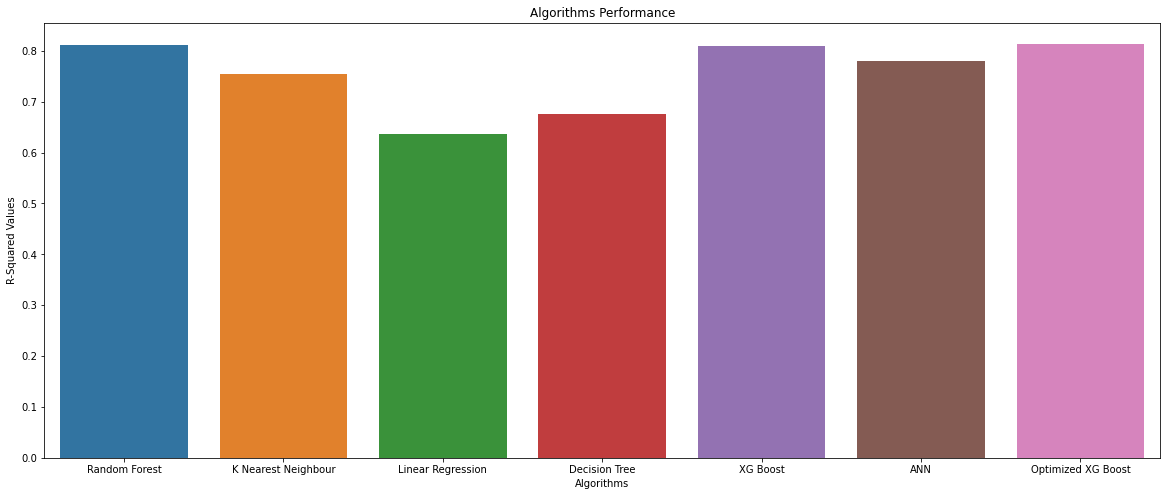

In [58]:
plt.figure(figsize=(20,8))
sns.barplot(x=list(algo_score.keys()), y=list(algo_score.values()))
plt.title("Algorithms Performance")
plt.xlabel("Algorithms")
plt.ylabel("R-Squared Values")
plt.show()

In [59]:
for key, val in algo_score.items():
    print(key, '--->', val)

Random Forest ---> 0.8104701460640636
K Nearest Neighbour ---> 0.7538540204577808
Linear Regression ---> 0.6358846067618822
Decision Tree ---> 0.6750111802932943
XG Boost ---> 0.8101861170775692
ANN ---> 0.7790035758287919
Optimized XG Boost ---> 0.8140431669907069


## Best performing Model is Optimized XG Boost